In [1]:
cd /projects/crunchie/boyanova/EEG_Things/

/projects/crunchie/boyanova/EEG_Things


In [ ]:
import numpy as np
import pandas as pd
import shutil
import os
from PIL import Image

df = pd.read_csv('./eeg_prep/exp_stimuli.csv')
target_path = "./eeg_prep/stimuli_real"
images_path = '/projects/crunchie/boyanova/EEG_Things/data_set/Images/'

# Ensure the target directory exists
os.makedirs(target_path, exist_ok=True)

# Copy each image to the target directory
for imID, image_cat in enumerate(df['image_category']):
    # Extract the image file name from the path
    image_name = df['image_name'].iloc[imID]
    image_path = os.path.join(images_path, image_cat, image_name)
    # Define the target file path
    target_file_path = os.path.join(target_path, image_name)
    
    # Copy the image to the target directory
    shutil.copy(image_path, target_file_path)
    
    # Optionally, print a message indicating the image has been copied
    print(f"Copied {image_path} to {target_file_path}")

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

folder_path = "./eeg_prep/stimuli_real"
output_folder = "./eeg_prep/stimuli_blurred"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Load the source image
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Load the image
        filepath = os.path.join(folder_path, filename)
        src = cv2.imread(filepath) #cv2.IMREAD_GRAYSCALE)
        src =  cv2.resize(src, (425, 425))
        dim1 = src.shape[0] - 1
        dim2 = int(dim1/2)

        # Create the mask for the "doughnut" shape
        mask = np.zeros_like(src)

        # Draw the "doughnut" shape
        cv2.circle(mask, (dim2, dim2), dim2-1, (dim1, dim1, dim1), thickness=-1)
        cv2.circle(mask, (dim2, dim2), 10, (0, 0, 0), thickness=-1)

        # Apply Gaussian blur to the mask
        mask_blur = cv2.GaussianBlur(mask, (71, 71), 2)

        # Normalize the mask to range [0, 1]
        mask_norm = mask_blur.astype(float) / 255

        # Apply the blending technique
        outpict = np.clip(src * mask_norm + 128 * (1 - mask_norm), 0, 255).astype(np.uint8)

        # Construct the output file path with ".jpg" extension
        output_filepath = os.path.join(output_folder, filename)

        # Save the blended image
        cv2.imwrite(output_filepath, outpict)

        # Display the blended image
        plt.imshow(outpict)
        plt.axis('off')
        plt.show()

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rc('image', cmap='viridis')



plt.rcParams.update({
    "font.family": "serif",  
    # use serif/main font for text elements
    })
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'axes.linewidth': 2.5})
plt.rcParams.update({'axes.labelweight': 'bold'})
plt.rcParams.update({'axes.labelsize': 20})
plt.rc('legend',fontsize=12)

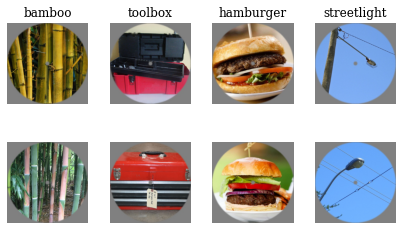

In [8]:
df = pd.read_csv('./eeg_prep/exp_stimuli.csv')
path_images = "./eeg_prep/stimuli_blurred"
extension = '{}'

stims_main = df[df.cond == "main"].image_name.values
stims_alt = df[df.cond == "alt"].image_name.values


fig, axes = plt.subplots(2, len(stims_main))
#fig, axes = plt.subplots(2, len(stims_main),figsize=(20, 15))
for ax_id, i in enumerate(stims_main):
    im_pt = os.path.join(path_images, extension.format(i))
    im = Image.open(im_pt)   
    axes[0, ax_id].imshow(np.array(im))
    axes[0, ax_id].axis(False)
    axes[0, ax_id].set_title(i[0:-8], fontsize = 12)
    
    im_pt = os.path.join(path_images, extension.format(stims_alt[ax_id]))
    im = Image.open(im_pt)   
    axes[1, ax_id].imshow(np.array(im))
    axes[1, ax_id].axis(False)

# Adjust the layout to remove extra space
plt.subplots_adjust(wspace=0.0, hspace=0.0)  # Adjust these values as needed

# Optionally, use tight_layout to optimize spacing
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('/projects/crunchie/boyanova/EEG_Things/eeg_prep/figures/01_exp_stimuli.png',dpi=300, bbox_inches = "tight")    